# Avaliação 02 - Introdução ao Aprendizado de Máquina (ENGG67)
**Alunos:**

- **Daniel da Rocha Carneiro**

- **Maurício dos Santos de Jesus**

- **Theo Farias**

----------

## 1) Utilizando um banco de dados sugerido por você, aborde o problema de regressão utilizando o algoritmo k-NN. Implemente a regressão em Jupyter Notebook.

A base de dados escolhida pelo grupo foi a do Setembro Amarelo. O grupo pretende analisar os dados relacionados à taxas de suicídio com fatores socioeconômicos.

----------

Setembro Amarelo: análise do suicídio no Brasil com Data Science
Todos os anos, mais de 12 mil pessoas tiram suas próprias vidas no Brasil. Em um cenário mundial, esse número ultrapassa 1 milhão de pessoas, levando o suicídio a ser considerado um problema de saúde pública.

Para você ter noção da dimensão desses números, saiba que o suicídio tem uma taxa maior do que vítimas de AIDS e da maioria dos tipos de câncer. Segundo a Organização Mundial da Saúde (OMS), o Brasil ocupa o oitavo lugar no número de suicídios no mundo: São 32 brasileiros por dia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

%matplotlib inline

In [2]:
# Carregar o arquivo CSV
df = pd.read_csv("suicide_rates.csv")


Dicionário de Variáveis
Esse arquivo csv possui 12 colunas. São elas:

country: país onde os dados foram registrados
101 países
year: ano em que os dados foram registrados
1987 a 2016
sex: sexo considerado no registro
male - masculino
female - feminino
age: faixa etária considerada
5-14 anos
15-24 anos
25-34 anos
35-54 anos
55-74 anos
75+ anos
suicides_no: número de suicídios
population: população para o grupo
suicides/100k pop: número de suicídios por 100 mil habitantes
country_year: identificador contendo country + year
HDI for year: Índice de Desenvolvimento Humano (IDH) para o ano
gdp_for_year: Produto Interno Bruto (PIB) para o ano
gdp_per_capita: Produto Interno Bruto (PIB) per capita

In [3]:
# ver o formato do DataFrame
print("Formato do DataFrame: ", df.shape)

# ver as 5 primeiras entradas dos dataset
df.head()

Formato do DataFrame:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# extrair apenas os dados relativos ao Brasil
df_brasil = df[df.country == "Brazil"].copy()

# ver o formato do novo DataFrame
print("Formato do DataFrame: ", df_brasil.shape)

# exibir as 5 primeiras entradas do novo DataFrame
df_brasil.head()

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


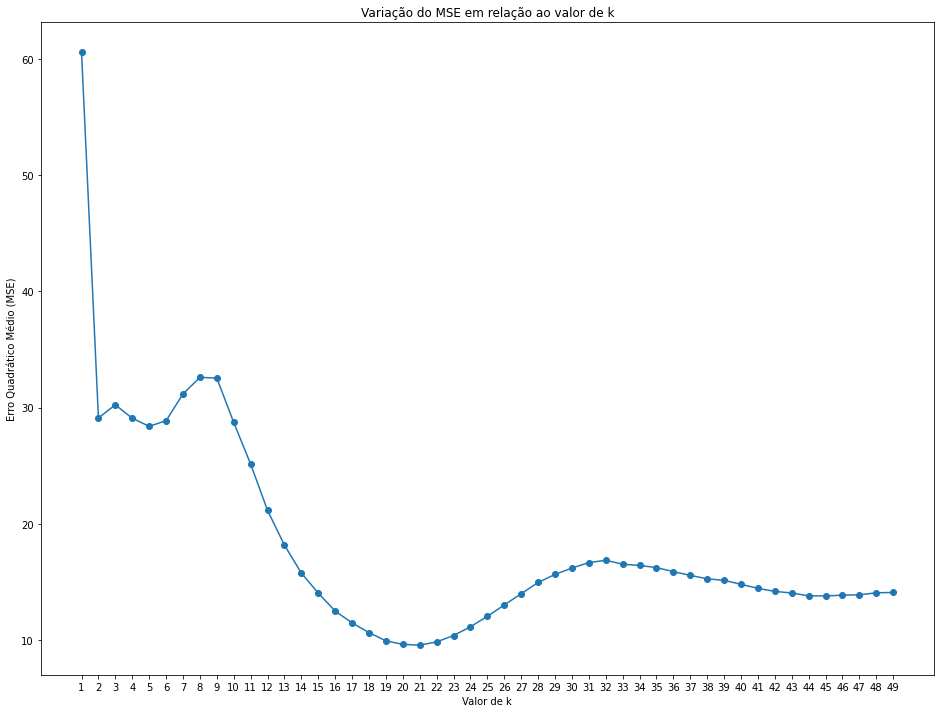

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Carregar o arquivo CSV
df = pd.read_csv("suicide_rates.csv")

# Filtrar somente os dados do Brasil
df_brazil = df[df['country'] == 'Brazil']

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_brazil.drop('suicides/100k pop', axis=1)  # Variáveis independentes
y = df_brazil['suicides/100k pop']  # Variável dependente

# Preencher valores ausentes com a média das colunas numéricas
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Converter a coluna 'country' em dados numéricos usando one-hot encoding
X_encoded = pd.get_dummies(X)

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Valores de k a serem testados
k_values = range(1, 50)

# Lista para armazenar os valores de MSE para cada valor de k
mse_values = []

# Loop pelos diferentes valores de k
for k in k_values:
    # Criar o modelo k-NN para regressão
    knn = KNeighborsRegressor(n_neighbors=k)

    # Ajustar o modelo aos dados de treinamento
    knn.fit(X_train, y_train)

    # Fazer previsões nos dados de teste
    y_pred = knn.predict(X_test)

    # Calcular o erro quadrático médio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotar o gráfico de variação do MSE em relação ao valor de k
plt.figure(figsize=(16, 12))
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Variação do MSE em relação ao valor de k')
plt.xticks(k_values)
plt.show()


Erro quadrático médio (MSE): 9.585173327286471
Coeficiente de determinação (R2): 0.7016479595261307


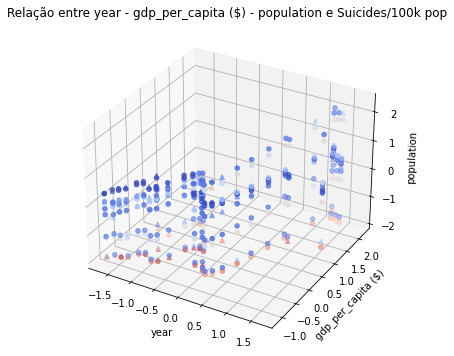

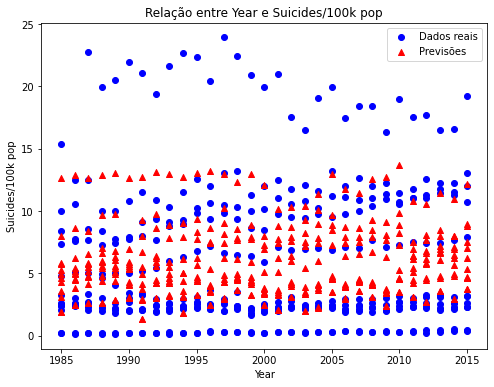

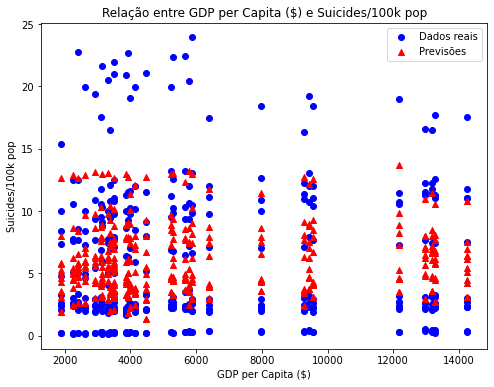

In [7]:

# Filtrar somente os dados do Brasil
df_brazil = df[df['country'] == 'Brazil']

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_brazil.drop('suicides/100k pop', axis=1)  # Variáveis independentes
y = df_brazil['suicides/100k pop']  # Variável dependente

# Preencher valores ausentes com a média das colunas numéricas
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Converter a coluna 'country' em dados numéricos usando one-hot encoding
X_encoded = pd.get_dummies(X)

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Criar o modelo k-NN para regressão
k = 21  # Valor de k
knn = KNeighborsRegressor(n_neighbors=k)

# Ajustar o modelo aos dados de treinamento
knn.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = knn.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R2):", r2)

# Criar um gráfico de dispersão 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Selecionar três variáveis independentes para o gráfico 3D
x_var = 'year'
y_var = 'gdp_per_capita ($)'
z_var = 'population'

# Plotar os dados de treinamento
ax.scatter(X_train[:, X_encoded.columns.get_loc(x_var)],
           X_train[:, X_encoded.columns.get_loc(y_var)],
           X_train[:, X_encoded.columns.get_loc(z_var)],
           c=y_train, cmap='coolwarm')

# Plotar os dados de teste
ax.scatter(X_test[:, X_encoded.columns.get_loc(x_var)],
           X_test[:, X_encoded.columns.get_loc(y_var)],
           X_test[:, X_encoded.columns.get_loc(z_var)],
           c=y_pred, cmap='coolwarm', marker='^')

# Configurar os rótulos dos eixos
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('Relação entre {} - {} - {} e Suicides/100k pop'.format(x_var, y_var, z_var))

# Mostrar o gráfico
plt.show()

# Gráfico 2D: Relação entre year e suicides/100k pop
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded['year'], y, c='b', label='Dados reais')
plt.scatter(X_encoded['year'], knn.predict(X_normalized), c='r', marker='^', label='Previsões')
plt.xlabel('Year')
plt.ylabel('Suicides/100k pop')
plt.title('Relação entre Year e Suicides/100k pop')
plt.legend()
plt.show()

# Gráfico 2D: Relação entre gdp_per_capita ($) e suicides/100k pop
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded['gdp_per_capita ($)'], y, c='b', label='Dados reais')
plt.scatter(X_encoded['gdp_per_capita ($)'], knn.predict(X_normalized), c='r', marker='^', label='Previsões')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides/100k pop')
plt.title('Relação entre GDP per Capita ($) e Suicides/100k pop')
plt.legend()
plt.show()
